In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.autograd.variable import Variable
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generator some real time-series data
def generate_real_samples(n):
    data = np.random.randn(n)
    return data

In [4]:
# Generator network
class Generator(nn.Module):
    def __init__(self,latent_dim=128):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.model = nn.Sequential(
            nn.Linear(self.latent_dim,64), # input dim = latent_dim = (128,64)
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,1)
        )

    def forward(self,x):
        return self.model(x)

In [5]:
# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.model = nn.Sequential(
        nn.Linear(1,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,1),
        nn.Dropout(p=0.2),
        nn.Sigmoid()
        )
    
    def forward(self,x):
        return self.model(x)

In [6]:
# Function to train the discriminator
def train_discriminator(discriminator, optimizer, real_data, fake_data):
    optimizer_D.zero_grad()
    
    # Train on real data
    prediction_real = discriminator(real_data)
    error_real = loss(prediction_real, torch.ones_like(prediction_real))
    error_real.backward()
    
    # Train on fake data
    prediction_fake=discriminator(fake_data.detach())
    error_fake=loss(prediction_fake,torch.zeros_like(prediction_fake))
    error_fake.backward()

    optimizer_D.step()

    return error_real+error_fake

In [7]:
# Function to train the generator
def train_generator(generator, optimizer, fake_data):
    optimizer_G.zero_grad()
    
    prediction = discriminator(fake_data)
    error = loss(prediction, torch.ones_like(prediction))
    error.backward()
    
    optimizer_G.step()
    
    return error

In [8]:
# Hyperparameterss
batch_size = 128
lr = 3e-4
epochs = 5000

# Models and optimizer
generator = Generator()
discriminator = Discriminator()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)
loss = nn.BCELoss()
latent_dim = 128


# Training loop
for epoch in range(1,epochs+1):
    # Generate real and fake data
    real_data = torch.Tensor(generate_real_samples(batch_size)).view(-1,1)
    fake_data = generator(Variable(torch.randn(batch_size,latent_dim)))
    
    # Train discriminator
    d_loss = train_discriminator(discriminator, optimizer_D, real_data, fake_data)
    
    # Train generator
    g_loss = train_generator(generator,optimizer_G,fake_data)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

Epoch: 100, D Loss: 1.0653563737869263, G Loss: 0.9933347105979919
Epoch: 200, D Loss: 1.4358363151550293, G Loss: 0.6891575455665588
Epoch: 300, D Loss: 1.159353256225586, G Loss: 0.8978955745697021
Epoch: 400, D Loss: 1.256850242614746, G Loss: 0.7417969703674316
Epoch: 500, D Loss: 1.062616229057312, G Loss: 1.1291309595108032
Epoch: 600, D Loss: 1.1456046104431152, G Loss: 0.8302503824234009
Epoch: 700, D Loss: 1.3052133321762085, G Loss: 1.06155526638031
Epoch: 800, D Loss: 1.27741277217865, G Loss: 0.8688163757324219
Epoch: 900, D Loss: 1.3761680126190186, G Loss: 0.7389061450958252
Epoch: 1000, D Loss: 1.1214277744293213, G Loss: 0.9430922865867615
Epoch: 1100, D Loss: 1.192719578742981, G Loss: 0.8733584880828857
Epoch: 1200, D Loss: 1.335883378982544, G Loss: 0.9312622547149658
Epoch: 1300, D Loss: 1.424865484237671, G Loss: 0.778600811958313
Epoch: 1400, D Loss: 1.3969950675964355, G Loss: 0.7017871737480164
Epoch: 1500, D Loss: 1.3927475214004517, G Loss: 0.6784706711769104


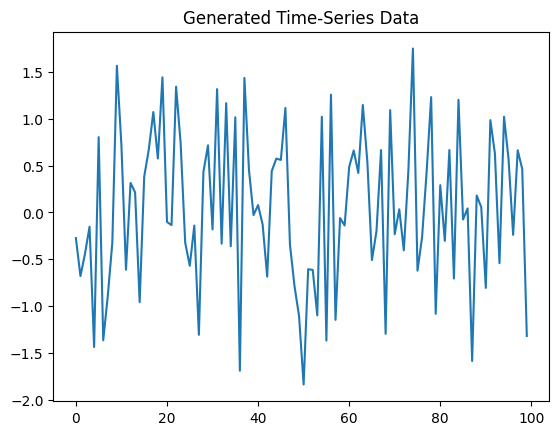

In [9]:
# Generate synthetic time-series data using the trained generator
generated_data = generator(Variable(torch.randn(100,latent_dim))).detach().numpy()

# Plot the generator
plt.plot(generated_data)
plt.title("Generated Time-Series Data")
plt.show()